<a href="https://colab.research.google.com/github/afs-mrf/Human_Action_Recognition_Project/blob/main/saving_weights_ResNet50_FineTune_on_mnist_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import numpy as np
import datetime as dt
from tensorflow.keras.utils import plot_model

In [3]:
(train_img, train_labels), (test_img, test_labels) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
train_img, test_img = train_img.astype('float64')/255, test_img.astype('float64')/255
train_img, test_img = np.reshape(train_img, (60000, 28, 28)), np.reshape(test_img, (10000, 28, 28))
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
Input_layer = layers.Input(shape=(28,28,1))

x_copy = Input_layer

Conv_layer1 = layers.Conv2D(32, (3,3), activation= 'relu', padding= 'same')(Input_layer)
Conv_layer2 = layers.Conv2D(32, (3,3), activation= 'relu', padding= 'same')(Conv_layer1)
Block1_output = layers.Add()([x_copy, Conv_layer2])

x_copy = Block1_output

Conv_layer3 = layers.Conv2D(32, (3,3), activation= 'relu', padding= 'same')(Block1_output)
Conv_layer4 = layers.Conv2D(32, (3,3), activation= 'relu', padding= 'same')(Conv_layer3)
Block2_output = layers.Add()([x_copy, Conv_layer4])

x_copy = Block2_output

Conv_layer5 = layers.Conv2D(64, (3,3), strides=(2,2), activation= 'relu', padding= 'same')(Block2_output)
Conv_layer6 = layers.Conv2D(64, (3,3), activation= 'relu', padding= 'same')(Conv_layer5)
#Block3_output = layers.Add()([x_copy, Conv_layer6])

x_copy = Conv_layer6

Conv_layer7 = layers.Conv2D(64, (3,3), activation= 'relu', padding= 'same')(Conv_layer6)
Conv_layer8 = layers.Conv2D(64, (3,3), activation= 'relu', padding= 'same')(Conv_layer7)
Block3_output = layers.Add()([x_copy, Conv_layer8])

x_copy = Block3_output

Conv_layer9 = layers.Conv2D(64, (3,3), activation= 'relu', padding= 'same')(Block3_output)
Conv_layer10 = layers.Conv2D(64, (3,3), activation= 'relu', padding= 'same')(Conv_layer9)
Block3_output = layers.Add()([x_copy, Conv_layer10])

x_copy = Conv_layer10


Conv_layer11 = layers.Conv2D(64, (3,3), activation= 'relu', padding= 'same')(Conv_layer10)
Conv_layer12 = layers.Conv2D(64, (3,3), activation= 'relu', padding= 'same')(Conv_layer11)
Block3_output = layers.Add()([x_copy, Conv_layer12])

flatten = layers.Flatten()(Block3_output)

cf = layers.Dense(10, activation= 'softmax')(flatten)


my_model = Model(inputs = Input_layer, outputs = cf)
my_model.summary()




Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 28, 28, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 28, 28, 32)     │            320 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 28, 28, 32)     │          9,248 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 28, 28, 32)     │              0 │ input_layer[0][0],     │
│                           │                        │                │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 28, 28, 32)     │          9,248 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 28, 28, 32)     │          9,248 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 28, 28, 32)     │              0 │ add[0][0],             │
│                           │                        │                │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 14, 14, 64)     │         18,496 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 14, 14, 64)     │         36,928 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 14, 14, 64)     │         36,928 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 14, 14, 64)     │         36,928 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 14, 14, 64)     │              0 │ conv2d_5[0][0],        │
│                           │                        │                │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 14, 14, 64)     │         36,928 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 14, 14, 64)     │         36,928 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 14, 14, 64)     │         36,928 │ conv2d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 14, 14, 64)     │         36,928 │ conv2d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)               │ (None, 14, 14, 64)     │              0 │ conv2d_9[0][0],        │
│                           │                        │                │ conv2d_11[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)    

 Total params: 430,506 (1.64 MB)

 Trainable params: 430,506 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
#plot_model(my_model)

In [15]:
# Compile the model
my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = my_model.fit(train_img, train_labels, epochs=4, batch_size=32, validation_split=0.2)


Epoch 1/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9938 - loss: 0.0204 - val_accuracy: 0.9862 - val_loss: 0.0511
Epoch 2/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9949 - loss: 0.0145 - val_accuracy: 0.9872 - val_loss: 0.0550
Epoch 3/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9960 - loss: 0.0126 - val_accuracy: 0.9872 - val_loss: 0.0608
Epoch 4/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9961 - loss: 0.0133 - val_accuracy: 0.9883 - val_loss: 0.0512


In [8]:
# Save the model after training
model_filename = 'my_model.keras'  # Specify the filename
my_model.save(model_filename)  # Save the model to a file
print(f'Model saved to {model_filename}')



Model saved to my_model.keras


In [9]:
# Load the model (optional, for demonstration)
from tensorflow.keras.models import load_model
loaded_model = load_model(model_filename)
print("Model loaded successfully.")

Model loaded successfully.


In [18]:
# Load the model
model_filename = 'my_model.keras'  # Specify the filename of the saved model
loaded_model = load_model(model_filename)  # Load the model
print("Model loaded successfully.")

# Specify the layer from which to save weights
layer_name = 'dense'  # Replace with the name of your layer
layer = loaded_model.get_layer(layer_name)  # Get the layer by name

# Get the weights and biases of the layer
weights, biases = layer.get_weights()

# Save weights to a text file
weights_filename = 'layer_weights.txt'
np.savetxt(weights_filename, weights, fmt='%.6f')  # Save weights
print(f"Weights of layer '{layer_name}' saved to {weights_filename}")

# Save biases to a separate text file (optional)
biases_filename = 'layer_biases.txt'
np.savetxt(biases_filename, biases, fmt='%.6f')  # Save biases
print(f"Biases of layer '{layer_name}' saved to {biases_filename}")

Model loaded successfully.
Weights of layer 'dense' saved to layer_weights.txt
Biases of layer 'dense' saved to layer_biases.txt


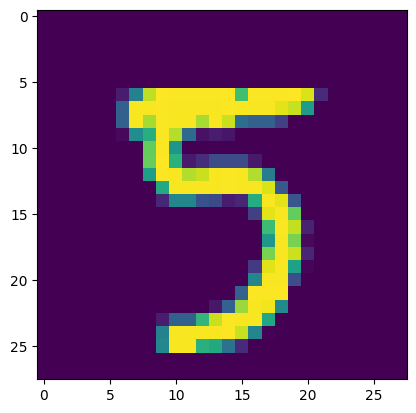

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
The sample is : 5


In [13]:
import matplotlib.pyplot as plt

image_index = 4440
#plt.imshow(test_images[image_index].reshape(28,28), cmap='Greys')
plt.imshow(test_img[image_index].reshape(28,28))
plt.show()
pred = my_model.predict(test_img[image_index].reshape(1,28,28,1))
print("The sample is :",pred.argmax())

313/313 - 2s - 6ms/step - accuracy: 0.9888 - loss: 0.0459


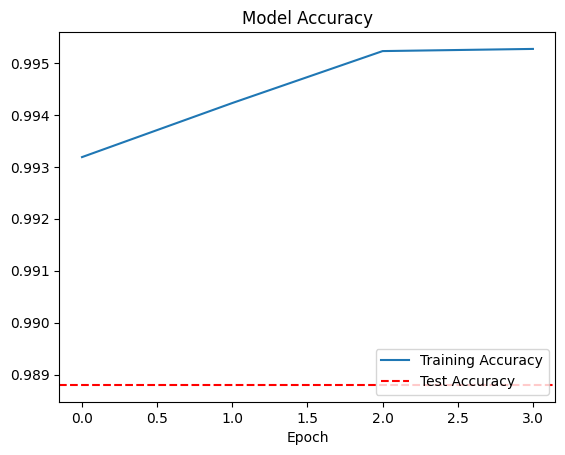

Test accuracy: 98.88%


In [16]:
test_loss, test_accuracy= my_model.evaluate(test_img, test_labels, verbose=2)
plt.plot(history.history['accuracy'], label ='Training Accuracy')
#plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.axhline(y= test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()
print(f"Test accuracy: {test_accuracy *100:.2f}%")